# Voice Emotion Recognition Project : Exploratory Data Analysis

## Dataset
For this project, we will use the Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS)" by Livingstone & Russo licensed under CC BY-NA-SC 4.0.

This database contains 1440 audio files from 24 Actors vocalizing two lexically-matched statements. Emotions include angry, happy, sad, fearful, calm, neutral, disgust, and surprised. 
( https://zenodo.org/record/1188976)


Please find below the filename identifiers:

Modality (01 = full-AV, 02 = video-only, 03 = audio-only).  
Vocal channel (01 = speech, 02 = song).  
Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).  
Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.  
Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").  
Repetition (01 = 1st repetition, 02 = 2nd repetition).  
Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).  

## Import the libraries and the dataframe

In [1]:
import librosa as lr
import librosa.display
import os
import pandas as pd
import numpy as np

import warnings

import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram

import IPython.display as ipd


warnings.simplefilter("ignore")

In [2]:
audio_df = pd.read_csv('audio_df.csv')
audio_df.head()

gender  emotion  actor                                               path
0   male  neutral      1  /Users/diebl/lab/FinalProject__RecognitionSpee...
1   male  neutral      1  /Users/diebl/lab/FinalProject__RecognitionSpee...
2   male  neutral      1  /Users/diebl/lab/FinalProject__RecognitionSpee...
3   male  neutral      1  /Users/diebl/lab/FinalProject__RecognitionSpee...
4   male     calm      1  /Users/diebl/lab/FinalProject__RecognitionSpee...

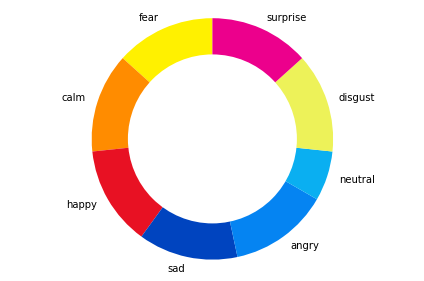

In [3]:
#Let's have a look to the distribution of emotions

emotion = ['fear','calm', 'happy', 'sad', 'angry', 'neutral', 'disgust', 'surprise']

y = audio_df['emotion']
values = np.unique(y,return_counts=True)[1]


labels = emotion
sizes = values

colors =['#fff100','#ff8c00','#e81123','#0044bf','#0584f2','#0aaff1','#edf259','#ec008c']


fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=emotion,startangle=90) #autopct='%1.1f%%',


centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()

# save the figure
#plt.savefig('emotions_Distribution.png', dpi=100, bbox_inches='tight')

plt.show()

## Exploring audio features relevant for human voice analysis

In [4]:
# neutral female voice telling "Kids are talking by the door."

audio ="/Users/diebl/lab/FinalProject__RecognitionSpeechEmotion/audio_speech_actors_01-24/Actor_02/03-01-01-01-01-01-02.wav" # change with the name of your audio
y, sr = lr.load(audio) 

In [5]:
ipd.Audio(audio)

**definition of signal :  An audio signal is a variation of air pressure in a certain quantity over time.** 

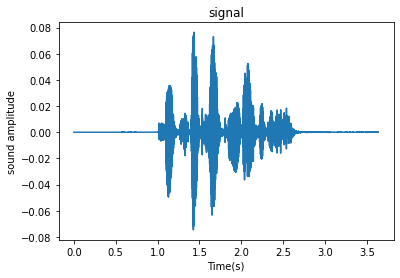

In [6]:
#timeline of the audio
time = np.arange(0,len(y))/sr
fig, ax = plt.subplots()
ax.plot(time,y)
ax.set(xlabel='Time(s)',ylabel='sound amplitude')
plt.title('signal')
# save the figure
#plt.savefig('signal.png', dpi=100, bbox_inches='tight')

plt.show()

**Definition of mel-Scaled Spectogram**:  A spectogramm is a way to visually represent a signal’s loudness, or amplitude, as it varies over time at different frequencies. 

A spectogramm is obtained by computing Fast-Fourier-Transformation on overlapping windowed segments of the signal. 

A mel Spectogram is a spectrogram where the frequencies are converted to the mel scale (y-axis). The colors represents the amplitude of the signal.

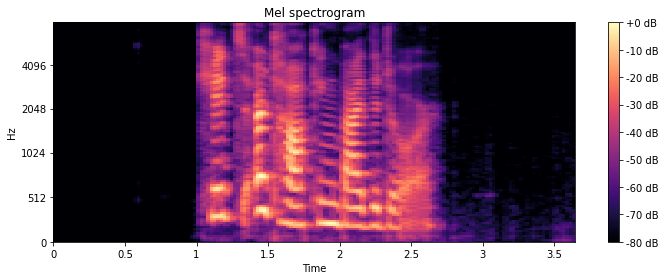

In [7]:
#Mel-Frequency Spectogram


lr.feature.melspectrogram(y=y, sr=sr)

D = np.abs(lr.stft(y))**2
S = lr.feature.melspectrogram(S=D)
S = lr.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
plt.figure(figsize=(10, 4))
lr.display.specshow(lr.power_to_db(S,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
# save the figure
#plt.savefig('mel.png', dpi=100, bbox_inches='tight')
plt.show()

**Definition of chroma : Chroma is a 12-element vector that measures energy from the sound pitch usually in deciBels (dB).**

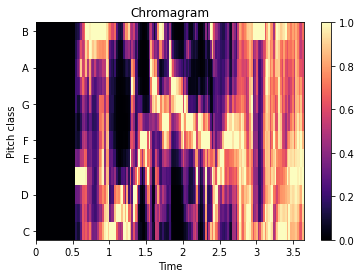

In [8]:
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
    
fig, ax = plt.subplots()
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)

ax.set(title='Chromagram')

# save the figure
#plt.savefig('Chromagram.png', dpi=100, bbox_inches='tight')
plt.show()

**Definition of MFCCS : MFCCs are the coefficients of the Mel-Frequency Cesptrum (MFC) which is a representation of the short-term power spectrum of a sound. Since MFCC features represent phonemes (distinct units of sound), MFCCs are commonly used as features in speech recognition systems.**


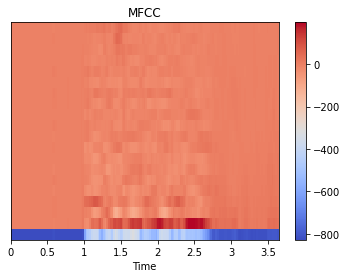

In [9]:
mfccs= librosa.feature.mfcc(y=y, sr=sr)


fig, ax = plt.subplots()
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='MFCC')
# save the figure
#plt.savefig('mfccs.png', dpi=100, bbox_inches='tight')
plt.show()

## Writing a function to visualize the feautures of our audio files

In [10]:
def visualization(audio):
    y, sr = lr.load(audio)
       
    #signal of the audio
    
    time = np.arange(0,len(y))/sr
    
    fig, ax = plt.subplots()
    ax.plot(time,y)
    ax.set(xlabel='Time(s)',ylabel='sound amplitude')
    plt.show() 
    
    #Mel-Scaled Spectogram

    lr.feature.melspectrogram(y=y, sr=sr)

    D = np.abs(lr.stft(y))**2
    S = lr.feature.melspectrogram(S=D)
    S = lr.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
    plt.figure(figsize=(10, 4))
    lr.display.specshow(lr.power_to_db(S,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel spectrogram')
    plt.tight_layout()
    # save the figure
    #plt.savefig('mel.png', dpi=100, bbox_inches='tight')
    plt.show()
    
    #MFCCS
    
    mfccs= librosa.feature.mfcc(y=y, sr=sr)
    
    fig, ax = plt.subplots()
    img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)
    fig.colorbar(img, ax=ax)
    ax.set(title='MFCC')
    plt.show()
    
    # Chroma
    chroma = librosa.feature.chroma_stft(S=S, sr=sr)
    
    fig, ax = plt.subplots()
    img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax)
    fig.colorbar(img, ax=ax)
    ax.set(title='Chromagram')
    plt.show()
    
    return ipd.Audio(audio)
    

## Visualization of emotions

**We will plot the following emotions : happy, suprise, angry and sad:**  
**- Both for female and male voices (random actors)**  
**- Statement : "Kids are talking by the door."**  

In [11]:
Female_Happy = "/Users/diebl/lab/FinalProject__RecognitionSpeechEmotion/audio_speech_actors_01-24/Actor_02/03-01-03-01-01-01-02.wav"

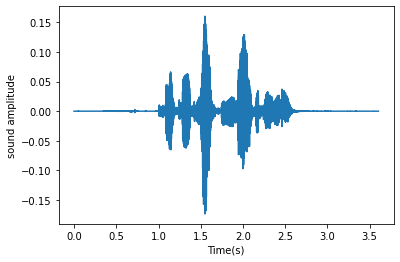

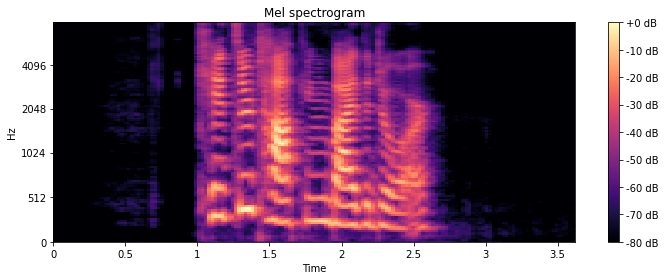

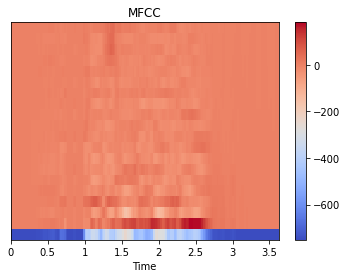

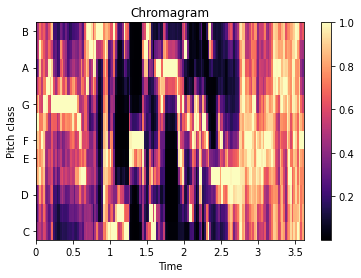

In [12]:
visualization(Female_Happy)

In [13]:
Male_Happy = "/Users/diebl/lab/FinalProject__RecognitionSpeechEmotion/audio_speech_actors_01-24/Actor_07/03-01-03-01-01-01-07.wav"

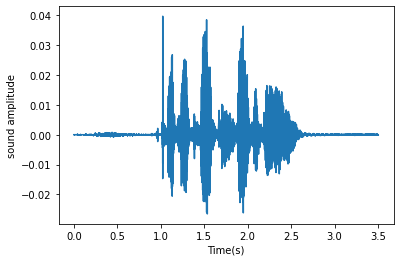

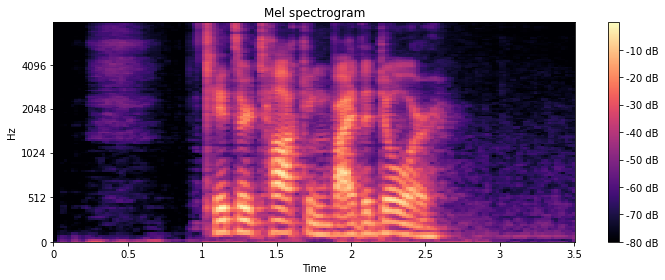

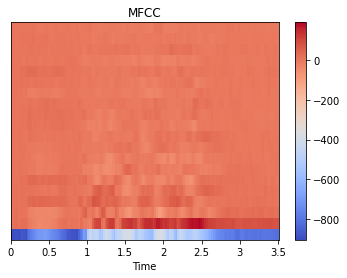

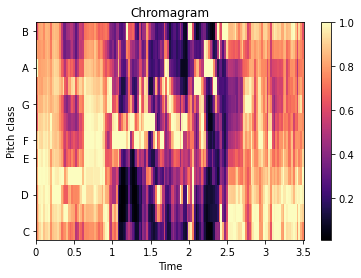

In [14]:
visualization(Male_Happy)

In [15]:
Female_Surprise = "/Users/diebl/lab/FinalProject__RecognitionSpeechEmotion/audio_speech_actors_01-24/Actor_12/03-01-08-01-01-01-12.wav"

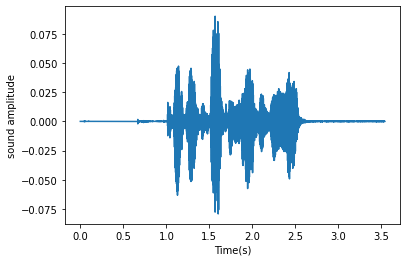

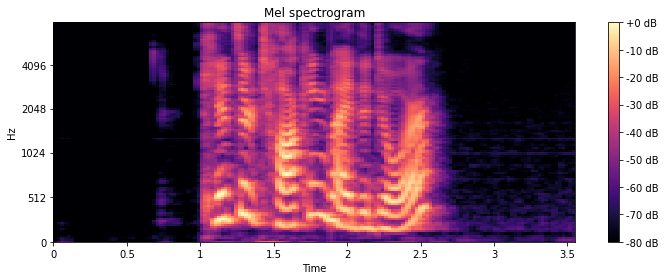

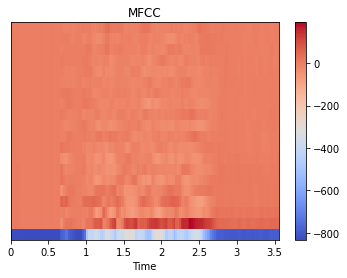

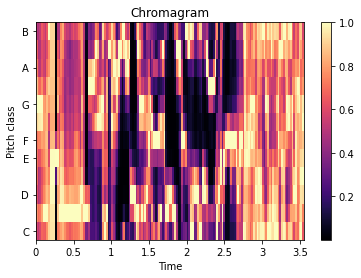

In [16]:
visualization(Female_Surprise)

In [17]:
Male_Surprise = "/Users/diebl/lab/FinalProject__RecognitionSpeechEmotion/audio_speech_actors_01-24/Actor_01/03-01-08-01-01-01-01.wav"

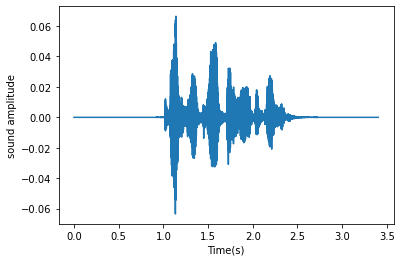

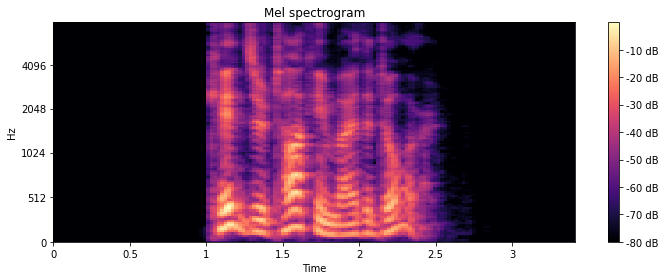

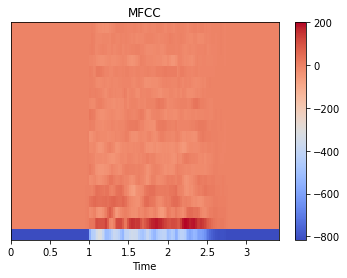

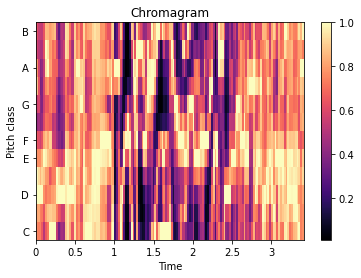

In [18]:
visualization(Male_Surprise)

In [19]:
Female_Angry = "/Users/diebl/lab/FinalProject__RecognitionSpeechEmotion/audio_speech_actors_01-24/Actor_14/03-01-05-01-01-01-14.wav"

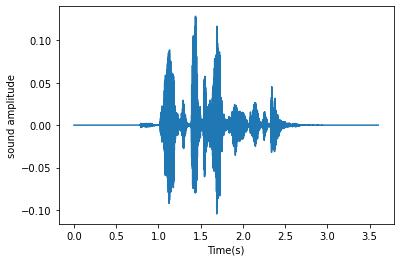

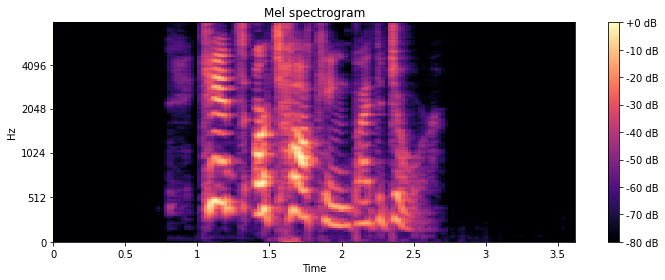

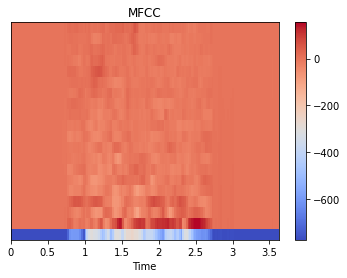

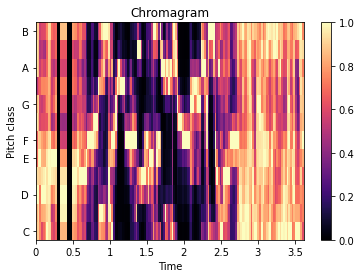

In [20]:
visualization(Female_Angry)

In [21]:
Male_Angry="/Users/diebl/lab/FinalProject__RecognitionSpeechEmotion/audio_speech_actors_01-24/Actor_23/03-01-05-01-01-01-23.wav"

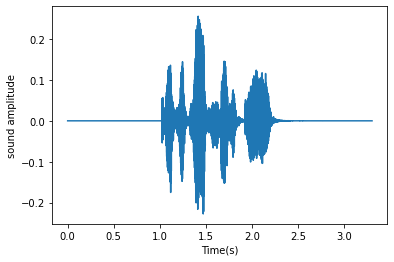

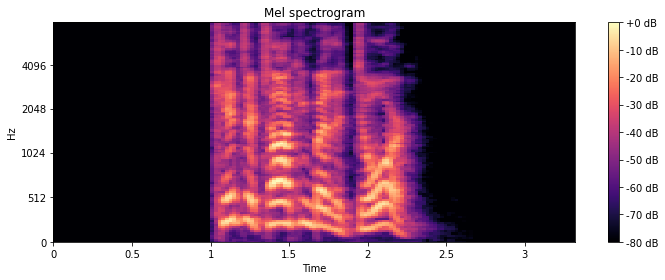

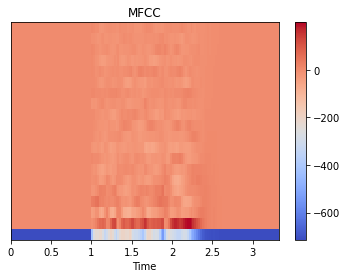

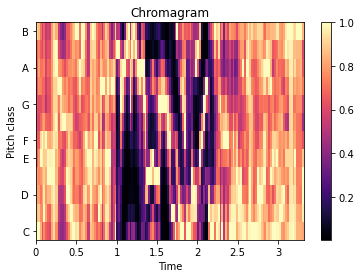

In [22]:
visualization(Male_Angry)

In [23]:
Female_Sad = "/Users/diebl/lab/FinalProject__RecognitionSpeechEmotion/audio_speech_actors_01-24/Actor_18/03-01-04-01-01-01-18.wav"

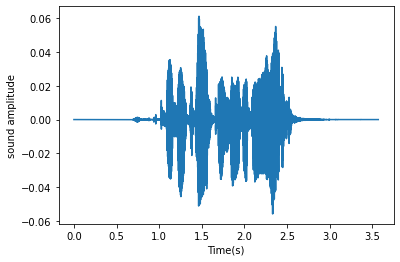

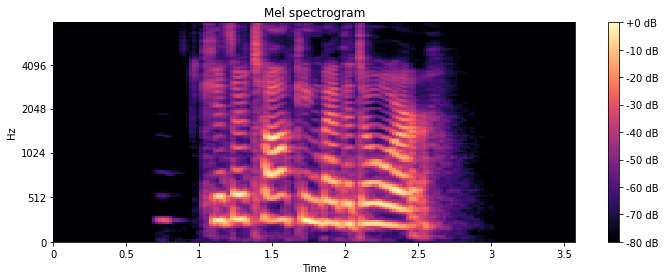

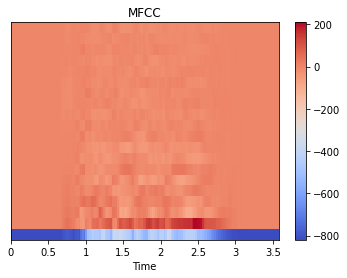

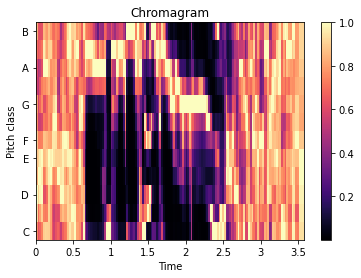

In [24]:
visualization(Female_Sad)

In [25]:
Male_Sad = "/Users/diebl/lab/FinalProject__RecognitionSpeechEmotion/audio_speech_actors_01-24/Actor_15/03-01-04-01-01-01-15.wav"

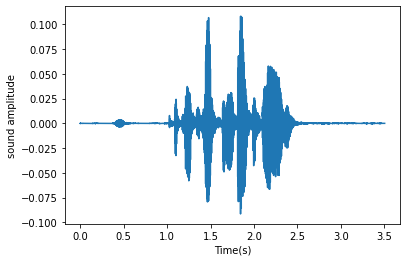

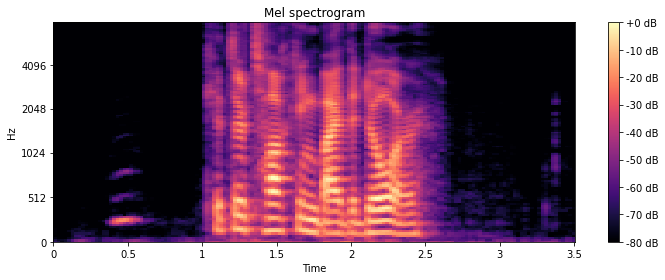

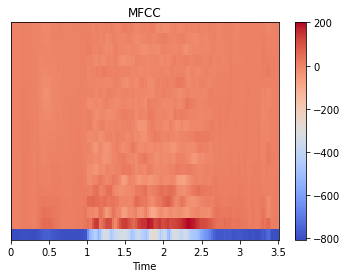

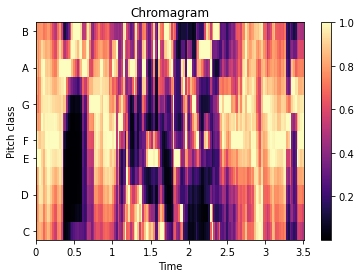

In [26]:
visualization(Male_Sad)